## Video Summarization

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Global Variables
vidArr = [] # saved frames
frameIni = 0
sec = 0
frameRate = 0.5 # //it will capture image in each 0.5 second
count=0
existFrame = True

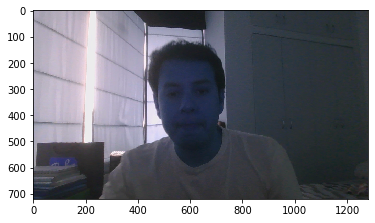

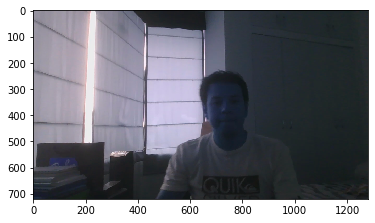

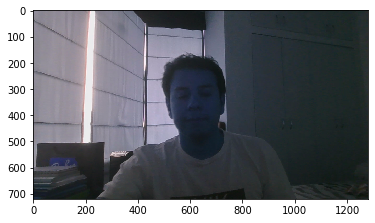

In [37]:
# Notes:
# Its necessary to crop the video to detail when the gesture begins

# TODO:
# Add Folder/File readers

videoList = ["Adios","BuenosDias", "Hola", "Saludos", "Chau"]

vidcap = cv2.VideoCapture(f"./Videos/{videoList[-1]}.mp4")

while existFrame: 
    if(count == 0):
      vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) # se toma el frame en el segundo
      hasFrames0, image0= vidcap.read() # se lee / hasframe-> boolean/ frameIni->image
      frameIni = image0
      vidArr.append(frameIni) # se almacena el frame inicial
      count = count + 1 # aumenta el contador
    else: 
      vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) # se toma el frame en el segundo
      hasFrames,image = vidcap.read() # se lee / hasframe-> boolean/ image->image

      if(image is not None):
        cm = np.corrcoef(frameIni.flat,image.flat)
        r = cm[0, 1]
        if(r < 0.95):
          vidArr.append(image)
          frameIni = image

      sec = sec + frameRate
      sec = round(sec, 2)
      count = count + 1
      existFrame = hasFrames
        
height, width, layers = frameIni.shape
size = (width,height)
out = cv2.VideoWriter(f"./Videos/Summary/{videoList[-1]}.mp4",cv2.VideoWriter_fourcc(*'MP4V'), 5, size)

for i in range(0,len(vidArr)):
    out.write(vidArr[i])
out.release()

for i in range(0,len(vidArr)):
  plt.figure()
  plt.imshow(vidArr[i])
plt.show()  

In [38]:
# Results
print("Number Frames:", count)
print("Number Summary Frames: ", len(vidArr))

Number Frames: 13
Number Summary Frames:  3


In [5]:
# Clean variables

# del vidcap 
# del vidArr
# del frameIni
# del sec
# del frameRate 
# del count
# del existFrame

## Skeleton Data Extraction

In [2]:
import sys
import cv2
import os
from sys import platform
import argparse

try:
    # Import Openpose (Windows/Ubuntu/OSX)
    dir_path = os.path.dirname(os.path.realpath(os.path.abspath('')))
    print(dir_path)
    try:
        # Windows Import
        if platform == "win32":
            sys.path.append("./openpose")
            import pyopenpose as op
        else:
            # Change these variables to point to the correct folder (Release/x64 etc.)
            sys.path.append('./openpose');
            # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
            # sys.path.append('/usr/local/python')
            from openpose import pyopenpose as op
    except ImportError as e:
        print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?', e)
        raise e
except Exception as e:
    print(e)
    sys.exit(-1)


C:\Users\andre\Desktop


In [27]:
# Openpose options 
params = dict()
params["model_folder"] = "./models/"
params["body"] = 1
params["model_pose"] = "BODY_25"
params["hand_detector"] = 3
params["hand_scale_range"] = 0.4
params["hand"] = True

def getKeyHandKeyPoints(file_name):
    try: 
        opWrapper = op.WrapperPython()
        opWrapper.configure(params)
        opWrapper.start()

        cap = cv2.VideoCapture(F"{file_name}")
        
        while(True):
            ret, frame = cap.read()

            datum = op.Datum()
            datum.cvInputData = frame
            opWrapper.emplaceAndPop([datum])
            #cv2.imshow("KeyPoints", datum.cvOutputData)
            key = cv2.waitKey(20)
            if key == 27:
                break
        cap.release()
        cv2.destroyAllWindows()
        return "OK"
        
    except Exception as e:
        return e
        sys.exit(-1)
        
def save_image_skeleton(file_name):
    
    params["write_images"] = f"{file_name}_k/"
    params["write_json"] = f"{file_name}_skd/"
    params["display"] = 0

    try: 
        opWrapper = op.WrapperPython()
        opWrapper.configure(params)
        opWrapper.start()

        cap = cv2.VideoCapture(F"{file_name}.mp4")
        
        number_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        for fr in range(number_frames):
            ret, frame = cap.read()
            datum = op.Datum()
            datum.cvInputData = frame
            opWrapper.emplaceAndPop([datum])

        cap.release()
        cv2.destroyAllWindows()

        return "OK"
    except Exception as e:
        return e
        sys.exit(-1)

In [4]:
summaryPath = "./Videos/Summary"

save_image_skeleton(f"{summaryPath}/Adios")            

1280.0
720.0


'OK'

['0_rendered.png', '1_rendered.png', '2_rendered.png']
0_rendered.png
1_rendered.png
2_rendered.png


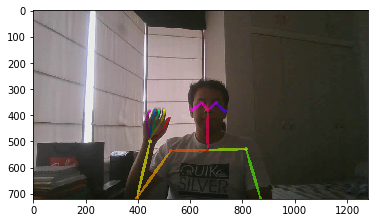

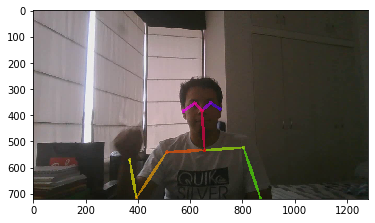

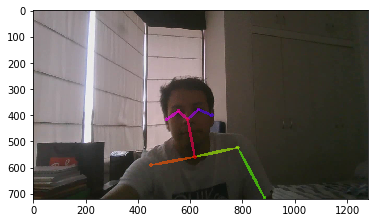

In [28]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
    
fileName = "Adios_k"
frames = os.listdir(f"./Videos/Summary/{fileName}/")

print(frames)

for frame in frames:
    img = mpimg.imread(f"./Videos/Summary/{fileName}/{frame}")
    print(frame)
    plt.figure()
    plt.imshow(img)
plt.show()  


In [84]:
# Read KeyPoints

import json

fileName = "Adios_skd"
keypointsPath = f"./Videos/Summary/{fileName}"
keypointsFiles = os.listdir(f"{keypointsPath}")

keypointsFiles

for keypoints in keypointsFiles:
    with open(f"{keypointsPath}/{keypoints}") as f:
        data = json.load(f)
        
        # Get Left - Right Keypoints
        hand_left_kp = data["people"][0]["hand_left_keypoints_2d"]
        hand_right_kp = data["people"][0]["hand_right_keypoints_2d"]
        
        # Pretty format
        hand_left_kp_pf = json.dumps(hand_left_kp, indent=2)
        hand_right_kp_pf = json.dumps(hand_right_kp, indent=2)
        
        print(f"\n\nName: {keypoints}")
        print(f"N° Keypoints: {len(hand_left_kp)}")
        print(f"\nLeft:\n {hand_left_kp}")
        print(f"\nRight:\n {hand_right_kp}")
        
# TODO: Add Normalization



Name: 0_keypoints.json
N° Keypoints: 63

Left:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Right:
 [445.833, 490.363, 0.641628, 473.81, 477.728, 0.601797, 497.275, 455.165, 0.784842, 510.813, 430.798, 0.821153, 520.74, 409.138, 0.799015, 489.153, 427.188, 0.833593, 498.178, 401.015, 0.685693, 500.885, 389.283, 0.703553, 499.983, 379.355, 0.698581, 467.493, 420.87, 0.678197, 478.323, 396.503, 0.590758, 481.03, 388.38, 0.672086, 481.933, 380.258, 0.482742, 452.15, 419.065, 0.664716, 458.468, 401.015, 0.701096, 463.883, 388.38, 0.663504, 467.493, 380.258, 0.712186, 431.393, 423.578, 0.747574, 436.808, 402.82, 0.818982, 438.613, 392.893, 0.841577, 445.833, 383.868, 0.847209]


Name: 1_keypoints.json
N° Keypoints: 63

Left:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,